## Determination of the slope of the curve relative to the conversion factor of Volts to displacements(in um)

Volts-X singal normalized and Y signal normalized measured in the QPD detector

displacement- The displacement is proportional to the ampltiude  (tipically 1um of amplyiude, meaning +/- oscillation form the center point, that is -9um)

**(file .LSdat)**

column one- displacement of the stage (measured by the strain gaugers)

column two- X signal normalized
            
column three-Y signal normalized  
            
column four- SUM signal

**The scan only saves one direction, so the acquisition has to be performed separatly for each axis**  

The graph of position calibration for Xsignal is given below:
The grid allows a best evaluation of which values should be chosen to intersect the slope, that is, the values for b1 and b2


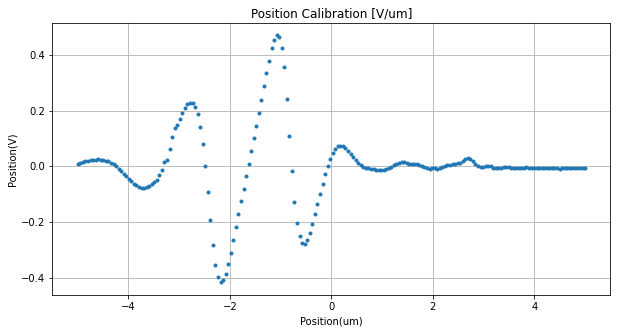

In [1]:
#import packages
import math
import matplotlib.pyplot as plt
import time
import numpy as np
#import pandas as pd

#To be able to open large files 
fileData=[]
def openFile(fileName): #fileName define below
    #open large txt files in python
    with open(fileName) as infile:
        for line in infile: #each line represents [x x x x] in the fileData [x x x x, y y y y]
            fileData.append(line) #to allocate the values in fileData
    return;

#columns of the .LSdat file 
columnOne=[] #stage
columnTwo=[] #X normalized signal
columnThree=[] #Y normalized signal
columnFour=[] #SUM signal 

##################################################
#reads the files after the 4 lines of introduction 
##################################################
#function readLineByLine for a clear separation of numbers, and in the corresponsing column
def readLineByLine():
    #len- size of the file fileData
    #actually at this point, as the file is not divided correctly size will only give us 
    #the size of the firts column, that is equal to the other two
    if len(fileData) > 0: #for a non null file 
        for line in fileData[4:]: #for each line [x x x x] fileData [x x x x, y y y y]
            newline=line.replace(",","") #eliminate the comma of column two (is per default) 
            splitedArray = newline.split(" ") #split line by space (to distinguish between values 
            #that are from different columns but that are present in the same line 
            #save values of each column in columnOne, columnTwo, columnThree (append-alocar)
            columnOne.append(splitedArray[0]) #will correspond to values of column one
            columnTwo.append(splitedArray[1]) #will correspond to values of column two
            columnThree.append(splitedArray[2]) #will correspond to values of column three
            columnFour.append(splitedArray[3]) #will correspond to values of column four
            #[0] corresponds to the element in the first indice of the array
    else:
        print("Empty array") #case of empty file
    return

#In order to convert the values of each column to floats 
#we don't need to initialize the variables, anyway we can do it
FColumnOne=[]
FColumnTwo=[]
FColumnThree=[]
FColumnFour=[]

#allows to measure the time necessary to run all the process
#it takes the initial time (clock of the computer) and with t1 sees the final time, t0 allows to meausre the spent time)
t0 = time.time()
#fileName open, fileName the corresponding directoty must be writen
fileName="C:\\Users\\nequi\\Documents\\16Junho\\300mA.LSdat"
openFile(fileName)
#to run the function (call the function)
readLineByLine()
#convert string to floats of each value (x) of each column to float(x)
FColumnOne=[float(x) for x in columnOne] #Values of columnOne in float
FColumnTwo=[float(x) for x in columnTwo] #Values of columnTwo in float
FColumnThree=[float(x) for x in columnThree] #Values of columnThree in float
FColumnFour=[float(x) for x in columnFour] #Values of columnFour in float

#Plot of the position of the bead recorded in the QPD 
#plot of the values in x axis from the first column (stage position) versus y axis from the second column (X normalized signal)
#plot of values in column one and column two
fig, axs = plt.subplots(figsize=(10, 5))
#plot of values in column one and column two
axs.plot(FColumnOne, FColumnTwo,'.')
plt.grid()
print('The graph of position calibration for Xsignal is given below:')
print('\033[1m' + 'The grid allows a best evaluation of which values should be chosen to intersect the slope, that is, the values for b1 and b2' + '\033[0m')
#labels of the graph
plt.title("Position Calibration [V/um]") #title of the graph
plt.xlabel("Position(um)") #stage position (um)
plt.ylabel("Position(V)") #X normalized values (Volts)
plt.show()


Text(0, 0.5, 'Position(V)')

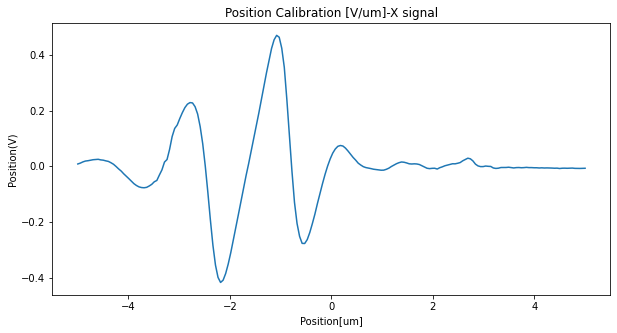

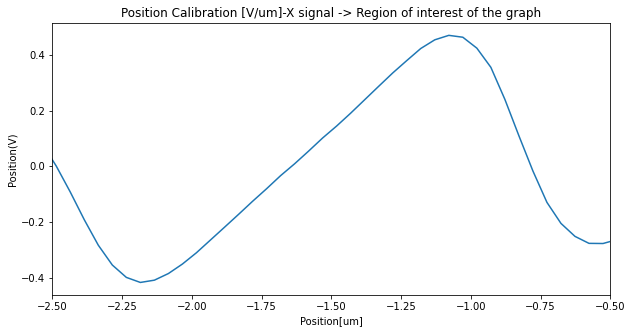

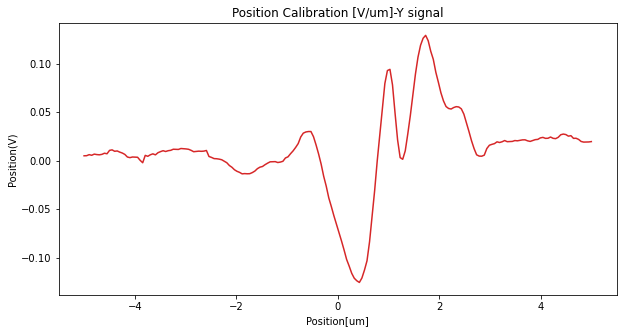

In [2]:
#To plot two graphs 
fig, axs = plt.subplots(figsize=(10, 5))
#plot of values in column one and column two
axs.plot(FColumnOne, FColumnTwo)
#labels of the graph
plt.title("Position Calibration [V/um]-X signal")
plt.xlabel("Position[um]")
plt.ylabel("Position(V)")


#To represent just a the region of interest of the graph
fig, axs = plt.subplots(figsize=(10, 5))

indices=np.where((np.array(FColumnOne) >= -2) & (np.array(FColumnOne) < -1.1))[0]
#-1 represents the last indice of the array
#plt.plot(FColumnOne[indices[0]:indices[-1]],FColumnTwo[indices[0]:indices[-1]])
plt.plot(FColumnOne,FColumnTwo)
plt.xlim([-2.5,-0.5])
plt.title("Position Calibration [V/um]-X signal -> Region of interest of the graph")
plt.xlabel("Position[um]")
plt.ylabel("Position(V)")

#To plot two graphs 
fig, axs = plt.subplots(figsize=(10, 5))
#plot of values in column one and column three
axs.plot(FColumnThree, FColumnFour,'tab:red')
#labels of the graph
plt.title("Position Calibration [V/um]-Y signal")
plt.xlabel("Position[um]")
plt.ylabel("Position(V)")

**Determination of the slope presented above - For signal X -> SlopeX[V/um]**


The declive should be determined between two values, positive and negative one, ensuring that the middle point between those two values is approximately zero, that is the center of the detector. Otherwise, the measurement should be repeated.


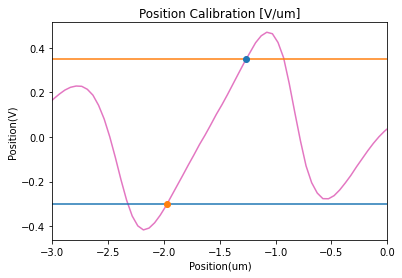

This value will corresponde to the initial value of the array that will be used to determine the curve_fit of the slope, that is, -1.2634392432336334
This value will corresponde to the initial value of the array that will be used to determine the curve_fit of the slope, that is, -1.9722636529869302
-0.3
The slope of the following graph is 0.917011309227104 V/um


In [3]:
#import packages
import math
import matplotlib.pyplot as plt
import time
import numpy as np
from shapely.geometry import LineString

indices=np.where((np.array(FColumnOne) >= -2) & (np.array(FColumnOne) < -1.1))[0]
#This will be important to adapt to the np.column_stack, so that the declive that is computed is adjusted to the region 
#of interest, that is the region that corresponds to the real size of the particle, the "inner" radius

print('The declive should be determined between two values, positive and negative one, ensuring that the middle point between those two values is approximately zero, that is the center of the detector. Otherwise, the measurement should be repeated.')

#To find the correct values to determine the slope 
#create two slopes with dclive null and point of intersection in the y axis
#This values of b1 and b2 will be chosen differently for each curve 
m1, b1 = 0, 0.35#line1- blue color
m2, b2 = 0, -0.30 #line2- green color
x = np.linspace(-5,5,500) #to define the range of the line 1 and line 2 in the x axis 
#To find the exact coordinates of the intersection
#To find the intersection of the points with line1 and line2 with graph
line1=LineString(np.column_stack((FColumnOne[indices[0]:indices[-1]],FColumnTwo[indices[0]:indices[-1]])))
line2=LineString(np.column_stack((x,x*m1+b1)))
line3=LineString(np.column_stack((x,x*m2+b2)))
intersection=line1.intersection(line2)
intersection2=line1.intersection(line3)
#plot of values in column one and column two -position calibration
plt.plot(FColumnOne,FColumnTwo, 'tab:pink')
#plot of the two lines, were x varies as defined here x = np.linspace(-5,5,500)
#the value of y is the second value chosen b1 and b2, as the value of m1 and m2 is null
plt.plot(x,x*m1+b1,'tab:orange')
plt.plot(x,x*m2+b2,'tab:blue')
#plot of the points of intersection
plt.plot(*intersection.xy,'o')
plt.plot(*intersection2.xy,'o')
plt.xlim([-3,0])
#labels of the graph
plt.title("Position Calibration [V/um]") #title of the graph
plt.xlabel("Position(um)") #stage position (um)
plt.ylabel("Position(V)") #X normalized values (Volts)
plt.show()

#How lists are defined - [] 
#[x for x in y] for a list
#How tuples are defined - ()
#To extract the values of the tupple
zipped = intersection.xy #each value represented separated by a comma (array('d', [-9.643396942559482]), array('d', [0.075]))
unzipped_object = zip(*zipped)
unzipped_list = list(unzipped_object) #the values are in a list [(-9.643396942559482, 0.075)]
#print(unzipped_list)

zipped2 = intersection2.xy #each value represented separated by a comma (array('d', [-9.643396942559482]), array('d', [0.075]))
unzipped_object2 = zip(*zipped2)
unzipped_list2 = list(unzipped_object2) #the values are in a list [(-9.643396942559482, 0.075)].
#print(unzipped_list2)

#to separate the numbers 
#x axis 
x1 = [item[0] for item in unzipped_list] #the first value (item[0] in the list unzipped_list) [-9.643396942559482]
y1 = [item[1] for item in unzipped_list] #the second value (item[1] in the list unzipped_list)
#y axis
x2 = [item[0] for item in unzipped_list2] #the first value (item[0] in the list unzipped_list2)
y2 = [item[1] for item in unzipped_list2] #the second value (item[1] in the list unzipped_list2)

#A simple way to extract the straight brackets is to compute the mean of the value in the list and then convert to float
#mean of each intersect point AND values in float
#for x axis
mediax1=np.mean(x1) #mean of the value in the list x1 -9.643396942559482
X1=float(mediax1) #Values of x1 in float (X1)
print('This value will corresponde to the initial value of the array that will be used to determine the curve_fit of the slope, that is,',X1)
mediax2=np.mean(x2) #mean of the value in the list x2 
X2=float(mediax2) #Values of x2 in float (X2)
print('This value will corresponde to the initial value of the array that will be used to determine the curve_fit of the slope, that is,',X2)

#for y axis
mediay1=np.mean(y1) #mean of the value in the list y1 
Y1=float(mediay1) #Values of y1 in float (Y1)
mediay2=np.mean(y2) #mean of the value in the list y2 
Y2=float(mediay2) #Values of y2 in float (Y2)
print(Y2)

#To determine the slope, we compute the difference between coordinates 
SlopetX=(Y2-Y1)/(X2-X1)
SlopeX=SlopetX
print('The slope of the following graph is', SlopeX, 'V/um')


**Values obtained for the slope, for each value of current**

In [1]:
import math
import matplotlib.pyplot as plt
import time
import numpy as np
from shapely.geometry import LineString
from tabulate import tabulate
#to print the values obtained for each current

#store the values of slopes for X and Ysignal
print('The slope of the Xsignal is',slopeX,'V/um')

%store slopeX

print( ) #to give some space 

#print(tabulate(['300mA', 4.244015896891903E-12], headers=['Current (mA)', 'Force (N/m)'])
print(tabulate([['300mA',slopeX], ], headers=['Current (mA)', 'SlopeX(V/um)']))
print( ) #to give some space 
print('Then, the slope needs to be converted to a beta value given in SI unit')

NameError: name 'SlopeX' is not defined

**Curve_fit to the R-squared value**

Curve_fit of the slope of the graph

\begin{equation}
   \texttt{$R^2$} = 1 - \left(\frac{SS_{res}}{SS_{tot}}\right)
\end{equation}

To compute the Total Sum of Squares

\begin{equation}
   \texttt{$SS_{tot}$} = \sum(yi-ymean)^2
\end{equation}

To compute the Residual Sum of Suqares

\begin{equation}
   \texttt{$SS_{res}$} = \sum(yi-ypredicted)^2
\end{equation}

In [ ]:
import scipy
import numpy as np
from scipy.optimize import curve_fit   

def slope(x0,a0,b0):       
    x=np.array(x0)                    
    a=np.array(a0)
    b=np.array(b0)
    return  a*x + b    
#curve_fit() returns the optimal values; Gives an array which 1st element is an array with the adjustment parameters (popt)
#and the 2nd element is a 2d array with the covariance of the parameters (pcov -> estimated covariance of popt) 

#popt(S0,f0)
xdata=(FColumnOne)
ydata=(FColumnTwo)
popt, pcov = curve_fit(slope,xdata[indices[0]:indices[-1]],ydata[indices[0]:indices[-1]]) 

a,b=popt
print(a)
print(b)

#To calculate the R-squared values (total variance) to find the SSTOT, that is, the Total Sum of Squares(SStot) , you subtract 
#the average (actual) value from each of the actual values. Then square each difference and sum all the results. 
#To find the Residual Sum of Squares(SSres) you subtract the actual value from the predicted values, then square it and sum all.
#Then substract one to the division between the SSres and SStot, then we have the R-squared.

#SSres
Residual= (ydata[indices[0]:indices[-1]] - slope(xdata[indices[0]:indices[-1]], *popt))
SSres= np.sum(Residual**2)

#SStot
RTotal= (ydata[indices[0]:indices[-1]] - np.mean(ydata[indices[0]:indices[-1]]))
SStot= np.sum(RTotal**2)

#RSquared_value
R_squared= 1- (SSres/SStot)

print('The square value is', R_squared)

#plot of the experimental data
plt.plot(xdata[indices[0]:indices[-1]],ydata[indices[0]:indices[-1]], 'tab:cyan',label='Experimental data')
#and the curve fit for the y=mx+b line 
plt.plot(xdata[indices[0]:indices[-1]], slope((xdata[indices[0]:indices[-1]]), *popt), 'tab:red',label='Lorentzian fit') #unpack values from popt ("tuple")
plt.legend()
plt.show()


In [2]:
#import packages
import math
import matplotlib.pyplot as plt
import time

#find the inverse of slope
#Xsignal
inverseX=1/slopeX

#SI units of the inverse of slope are given in meters per Volts, so a proper conversion of units is done
#1um=10E-6 m 
units=1E-6
#beta for X signal
betaX=inverseX*units

print('The sensitivity of the detetor for Xsignal is given by beta value', betaX, 'm/V \n')

#store the beta values
%store betaX

NameError: name 'slopeX' is not defined

**Values obtained for beta value (m/V), for each value of current**

In [3]:
from tabulate import tabulate
#to print the values obtained for each current

#print(tabulate(['300mA', 4.244015896891903E-12], headers=['Current (mA)', 'Force (N/m)'])
print(tabulate([['300mA',betaX], ], headers=['Current (mA)', 'betaX(m/V)']))


NameError: name 'betaX' is not defined

**After the position calibration is determined for X and Y signal separately, the position and stiffness can be determined in SI units. Then the force can be computed**